# Image compressions with K-Means

In [4]:
# Importing necessary libs and functs
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [5]:
plt.rcParams['figure.figsize']= (18,12)

(700, 1600, 4)


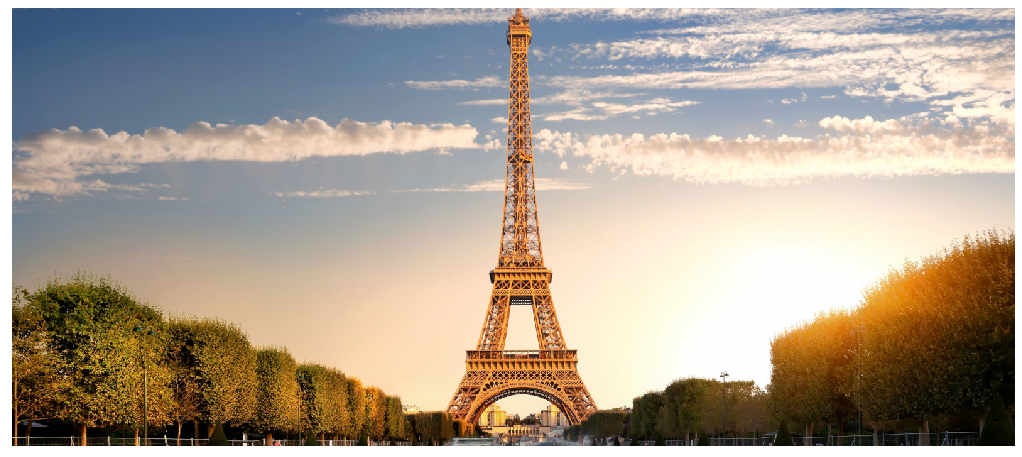

In [20]:
# Preprocessing : 
img = io.imread('images/Eiffel_Tower.jpg')
ax = plt.axes(xticks=[],yticks=[])
print(img.shape)
ax.imshow(img);

In [19]:
img_data = (img / 255).reshape(-1,3)
img_data.shape

ValueError: cannot reshape array of size 4480000 into shape (3)

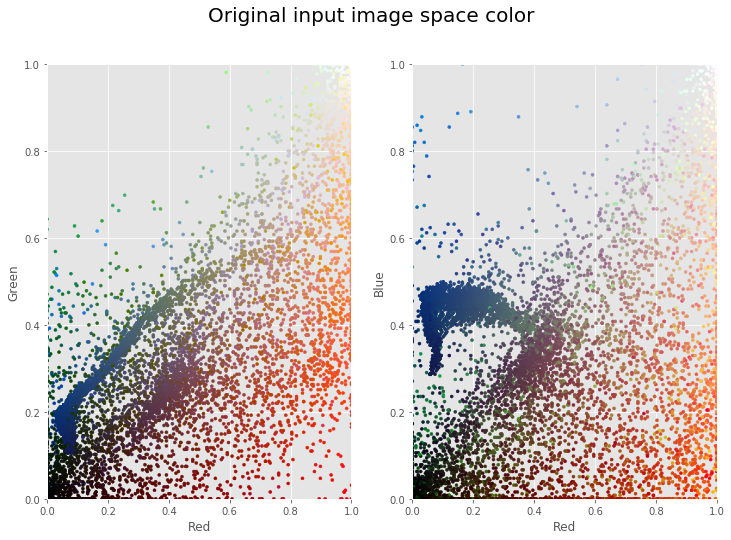

In [17]:
# Color space :
class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)
x_img = plot_utils(img_data, title='Original input image space color')
x_img.colorSpace()

## Reducing color space with KMeans to k colors
### We take k = 32
